# Lectura, análisis y graficación de datos

En esta notebook aprenderemos a:
* cargar datos de archivo
* aplicar transformaciones a los datos
* realizar un ajuste
* graficar los resultados

Usaremos la biblioteca **más importante** para ciencia que es **numpy** 

In [2]:
import numpy as np

Ahora podremos acceder a todas las funciones y atributos de numpy como `np.algo`

In [3]:
np.pi

3.141592653589793

In [4]:
np.sin(np.pi)

1.2246467991473532e-16

¿Por qué no es cero? (⊙_☉)

Carguemos datos "experimentales" para analizar...

In [77]:
data = np.genfromtxt('exp_raw_data.dat') #carga el archivo completo!

In [78]:
data.shape #nos permite saber la "forma" de la matriz

(100, 2)

Queremos que la primer columna sea la variable `x` y la segunda la variable `y`

In [79]:
x = data[:,0] # los ":" en la primera posicion quiere decir todas las filas, el "0" quiere decir 1era columa
y = data[:,1] # el "1" quiere decir 2nda columa

In [81]:
import matplotlib.pyplot as plt #para graficar
%matplotlib inline 
# la segunda línea es para que nos muestre los gráficos en la notebook

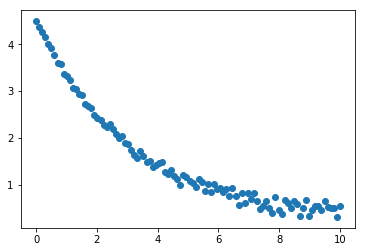

In [82]:
plt.scatter(x,y)

Queremos normalizar la variable `y` (dividirla por el valor más grande) y pasar la `x` de segundos a milisegundos. Para eso:

In [83]:
x = x * 1000
y = y/y.max()

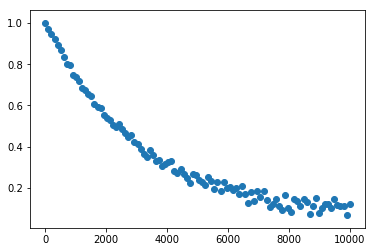

In [84]:
plt.scatter(x,y)

Ahora ajustaremos una exponencial a estos datos. Para esto usaremos el método `curve_fit()` del módulo `scipy.optimize`

In [86]:
from scipy import optimize

Cuando se tenga duda de la sintaxis, se puede ver la documentación con un signo ? al final:

In [90]:
optimize.curve_fit?

La doc indica que los parámetros obligatorios son una función f, xdata e ydata. Por lo que debemos definir una función. En general una función se define:

`def fun(val1, val2):`

    ...
    return algo
    
    
La función a la que lo queremos ajustar es:
$$ y = A \exp(-t/\tau) $$

In [89]:
def exp(x,a,tau):
    """ Devuelve la exponencial negativa para un número o array de numpy x, 
    con factor pre-exponencial a y tiempo característico tau"""
    return a * np.exp(-x/tau)

Ahora podemos hacer el ajuste propiamente dicho (notar que devuelve dos resultados, los parámetros optimizados `popt` y su covarianza `pcov`)

In [91]:
popt, pcov = optimize.curve_fit(exp,x,y)

/home/franco/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [92]:
opt_a, opt_tau = popt
popt

array([ 1.,  1.])

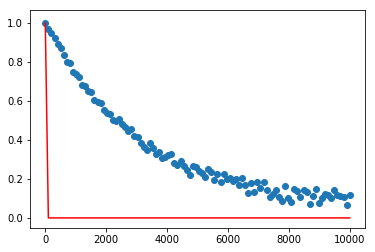

In [93]:
plt.scatter(x,y)
plt.plot(x, exp(x, opt_a, opt_tau),c='r')

El resultado dio como el culo, debido a que el inicial guess por defecto es 1 para todos los parámetros (factor pre-exponencial y tiempo característico en este caso).

Por eso conviene estimar "a ojo" los parámetros mirando el scatter plot, y dárselos a `curve_fit` a través del parámetro p0 (initial guess), que se escribe como lista:

In [94]:
popt, pcov = optimize.curve_fit(exp,x,y,p0=[1, 3500])
opt_a, opt_tau = popt

In [95]:
popt

array([  9.71897372e-01,   3.66855467e+03])

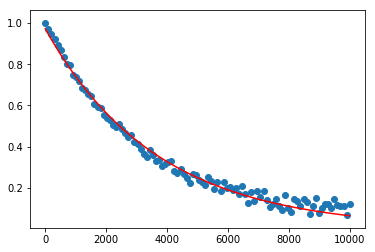

In [96]:
plt.scatter(x,y)
plt.plot(x, exp(x, opt_a, opt_tau),c='r')

In [100]:
yfit = exp(x, opt_a, opt_tau)

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text yticklabel objects>)

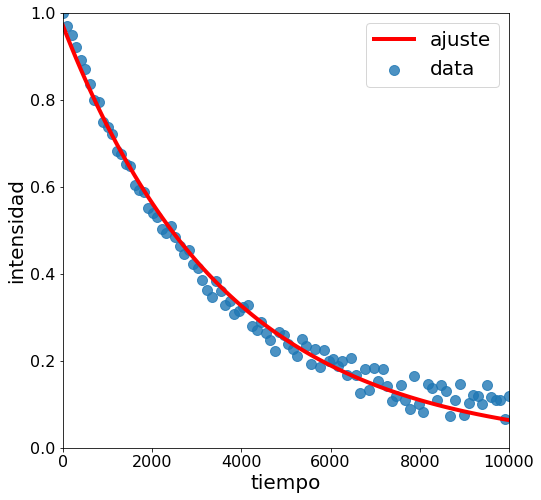

In [99]:
plt.figure(figsize=(8,8))
plt.scatter(x,y,alpha=0.8,s=100,label='data')
plt.plot(x, exp(x, opt_a, opt_tau),c='r',lw=4,label='ajuste')
plt.xlim(0,10000)
plt.ylim(0,1)
plt.legend(loc='upper right', fontsize=20)
plt.xlabel('tiempo', fontsize=20)
plt.ylabel('intensidad', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.savefig('plot.png',dpi=300)

Para guardar los datos experimentales y el ajuste a archivo, podemos usar `np.savetxt`. Si le pasamos una tupla de arrays (array1, array2, ...) los escribirá **en filas**, lo que resulta inconveniente. Para que los escriba en columnas, simplemente los envolvemos con un `np.column_stack()` que los ordena en columnas.

In [103]:
np.savetxt('exp_normal_data.dat', np.column_stack((x,y)))
np.savetxt('exp_fit.dat', np.column_stack((x,yfit)))

Nota al pie: para generar los datos que analizamos usé las siguientes funciones:

In [ ]:
x = np.linspace(0,10,100)
y = 4.5 * (np.exp(-x/np.pi) + 0.1*np.random.rand(100)*np.sqrt(x/10))
np.savetxt('exp_raw_data.dat', np.column_stack((x,y)))

En el próximo notebook veremos cómo resolver ecuaciones directamente de forma numérica desde cero.